# INF6804 - Vision par ordinateur
## Hiver 2021 - TP1 - Description et comparaison de regions d’interet
### Membres de l'équipe
    - Pierre-Luc Chartier - 1805679
    - Marc-Olivier Belanger - 


## Directives de remise
Remise sur moodle. Une version du code et rapport.

Remise avant le 15 fevrier 2021, 17h00. Tout travail en retard sera pénalisé.

In [401]:
import cv2  
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Partie 1: Techniques de manipulation d'image

## Section 1 Manipulation et extraction des regions d'interets

Importation des images

In [402]:
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/ski.jpg
!gdown https://raw.githubusercontent.com/mabelal/inf6804/master/TP1/Data/part1/images/airplanes.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/bicycle.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/highway.jpg
!gdown https://raw.githubusercontent.com/mabelal/inf6804/master/TP1/Data/part1/images/road.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/skate1.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/skate2.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/tree.jpg

Downloading...
From: https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/ski.jpg
To: /content/ski.jpg
100% 52.7k/52.7k [00:00<00:00, 7.30MB/s]
Downloading...
From: https://raw.githubusercontent.com/mabelal/inf6804/master/TP1/Data/part1/images/airplanes.jpg
To: /content/airplanes.jpg
100% 42.4k/42.4k [00:00<00:00, 14.9MB/s]
Downloading...
From: https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/bicycle.jpg
To: /content/bicycle.jpg
100% 129k/129k [00:00<00:00, 8.55MB/s]
Downloading...
From: https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/highway.jpg
To: /content/highway.jpg
100% 86.8k/86.8k [00:00<00:00, 11.5MB/s]
Downloading...
From: https://raw.githubusercontent.com/mabelal/inf6804/master/TP1/Data/part1/images/road.jpg
To: /content/road.jpg
100% 67.2k/67.2k [00:00<00:00, 9.85MB/s]
Downloading...
From: https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/images/skate1.jpg
To: /conten

In [403]:
list_keys = ['airplanes', 'bicycle', 'highway', 'road','skate1', 'skate2', 'ski',  'tree']
dict_images = {}
for it in list_keys:
  filename = it + '.jpg'
  dict_images[it] = cv2.imread(filename)[:,:,::-1] 

Definitions des regions d'interets

In [404]:
import json
from google.colab.patches import cv2_imshow

In [405]:
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/gt.json

Downloading...
From: https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part1/gt.json
To: /content/gt.json
6.76kB [00:00, 14.9MB/s]       


In [406]:
with open('gt.json') as f:
  data = json.load(f)

list_annotations = data['annotations']
print(list_annotations)

[{'image': 'airplanes', 'bbox': [385.66, 196.95, 120.0, 80.97], 'category_id': 5}, {'image': 'airplanes', 'bbox': [333.91, 301.39, 126.73, 78.3], 'category_id': 5}, {'image': 'bicycle', 'bbox': [225.82, 44.47, 379.62, 372.6], 'category_id': 2}, {'image': 'bicycle', 'bbox': [133.74, 118.54, 101.25, 235.95], 'category_id': 11}, {'image': 'highway', 'bbox': [161.4, 121.13, 240.68, 195.79], 'category_id': 8}, {'image': 'highway', 'bbox': [276.06, 70.63, 90.56, 53.88], 'category_id': 8}, {'image': 'road', 'bbox': [383.36, 278.27, 167.51, 117.05], 'category_id': 3}, {'image': 'road', 'bbox': [34.44, 41.97, 229.24, 360.54], 'category_id': 8}, {'image': 'road', 'bbox': [255.57, 152.59, 175.03, 205.1], 'category_id': 8}, {'image': 'road', 'bbox': [430.64, 293.73, 35.64, 23.56], 'category_id': 1}, {'image': 'road', 'bbox': [523.71, 33.79, 115.56, 435.92], 'category_id': 8}, {'image': 'skate1', 'bbox': [290.88, 151.47, 107.58, 123.06], 'category_id': 18}, {'image': 'skate1', 'bbox': [120.04, 68.1

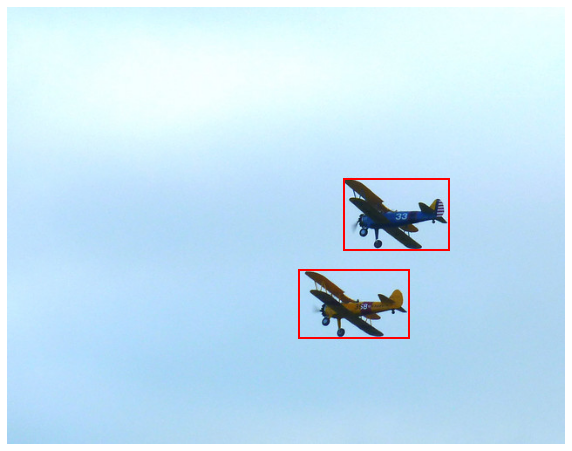

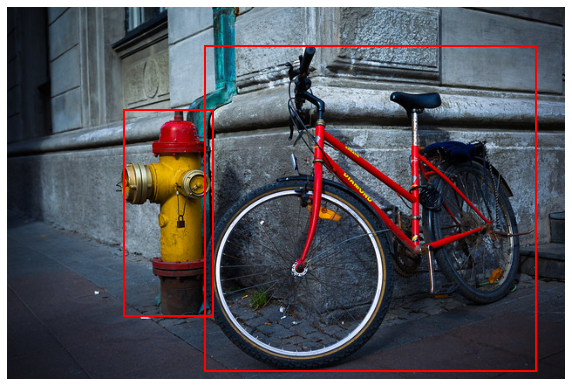

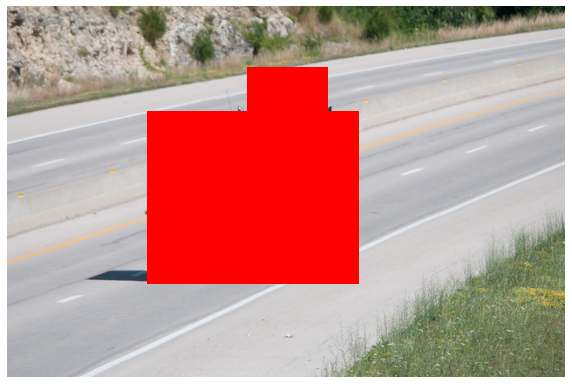

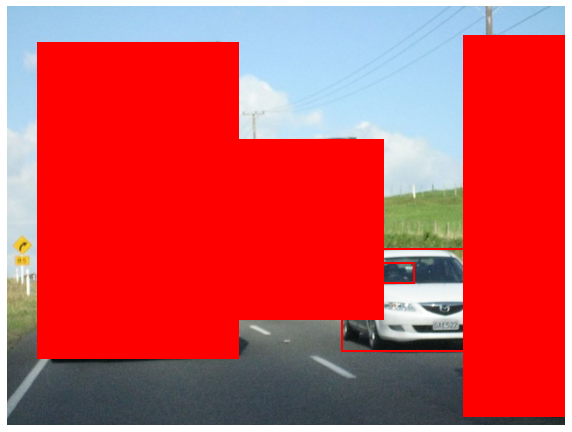

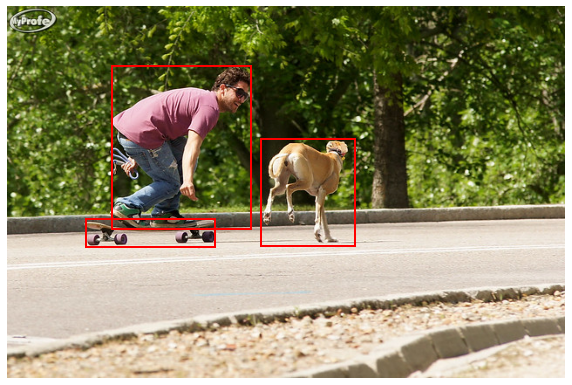

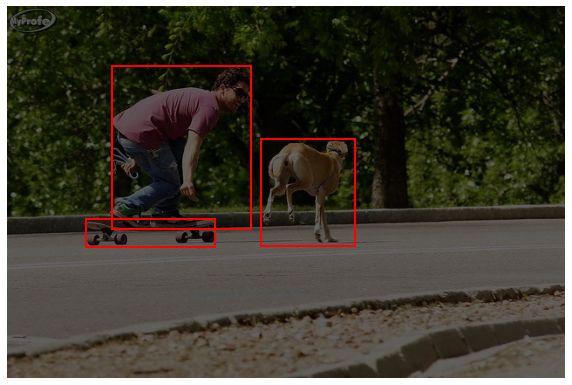

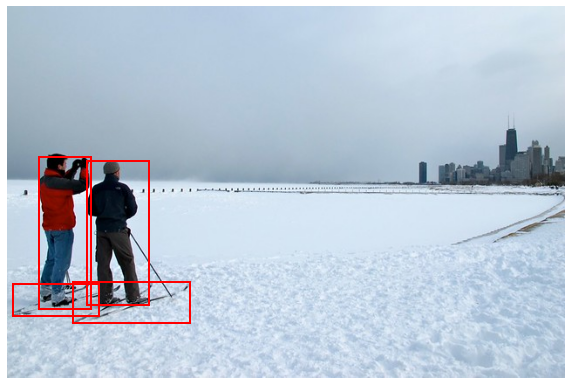

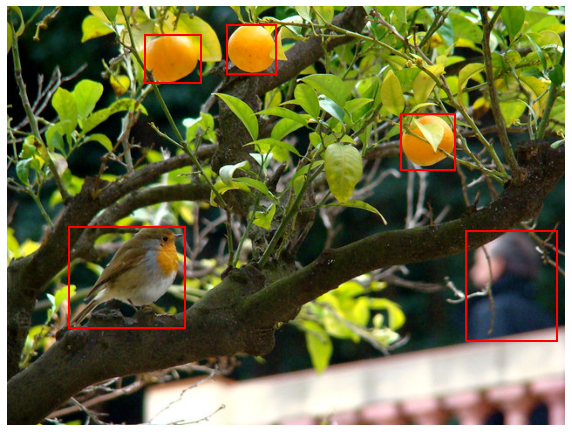

In [409]:
for img in list_keys:
  fig,ax = plt.subplots(1,figsize=(10, 10))
  ax.imshow(dict_images[img])
  for it in list_annotations:
    if it['image']==img:
      bbox = it['bbox']
      rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
      if it['category_id'] == 8:
         rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='r')
      ax.add_patch(rect)
  plt.axis('off')
  plt.show()
      

## Section 2: Description des regions d’interet par histogramme de couleurs RGB

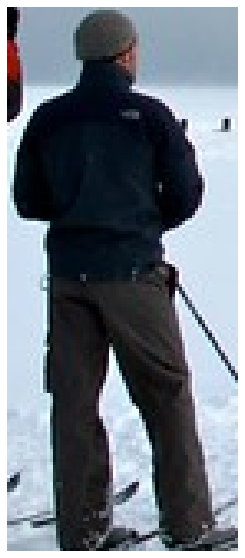

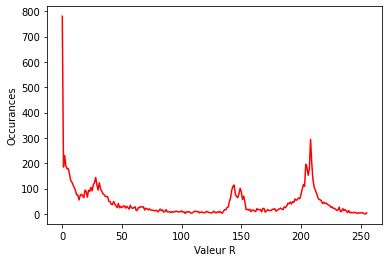

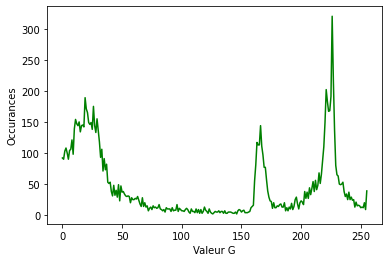

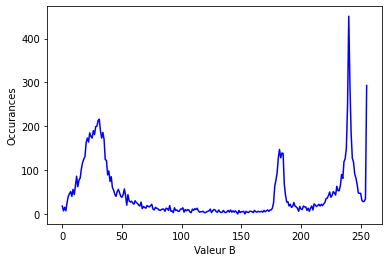

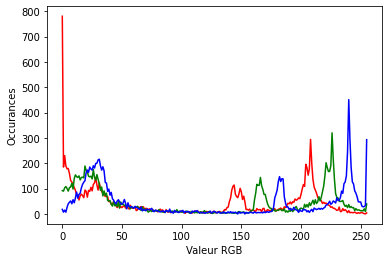

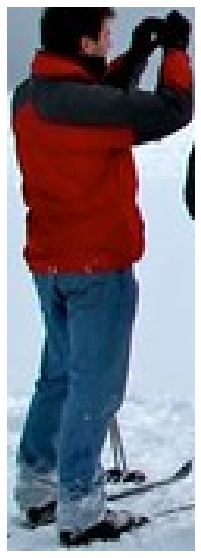

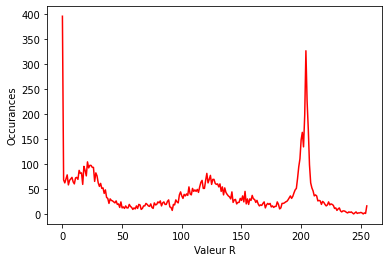

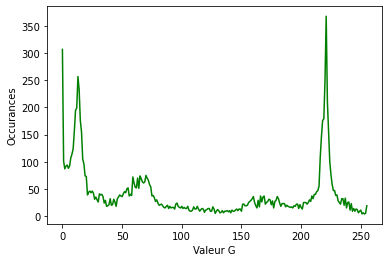

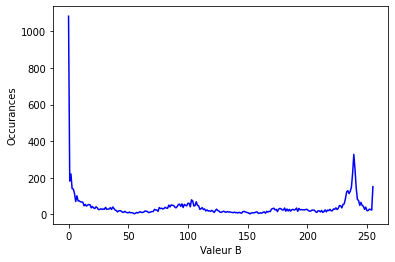

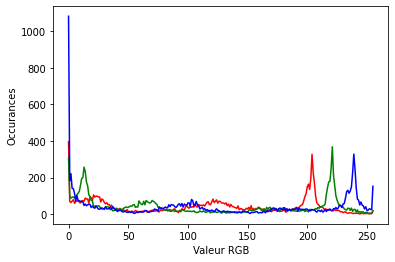

In [412]:
key_id=6
for it in list_annotations:
  if (it['image']==list_keys[key_id]) & (it['category_id']==1):
    fig,ax = plt.subplots(1,figsize=(10, 10))
    bbox = it['bbox']
    crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
    ax.imshow(crop_img)
    plt.axis('off')
    plt.show()
    hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    plt.xlabel("Valeur R")
    plt.ylabel("Occurances")
    plt.show()
    hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    plt.xlabel("Valeur G")
    plt.ylabel("Occurances")
    plt.show()
    hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.xlabel("Valeur B")
    plt.ylabel("Occurances")
    plt.show()
    hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.xlabel("Valeur RGB")
    plt.ylabel("Occurances")
    plt.show()

## Section 3: Description des regions d’interet par histogramme de couleurs HSV

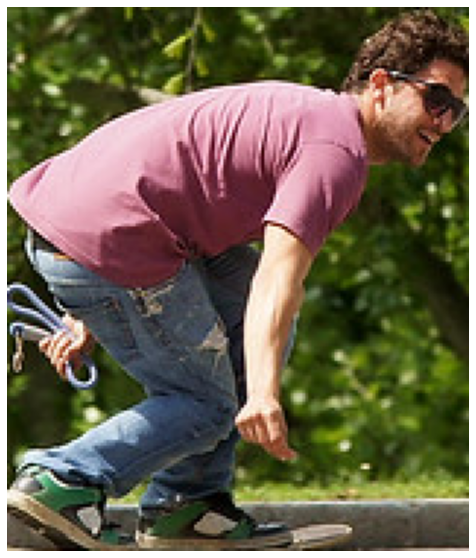

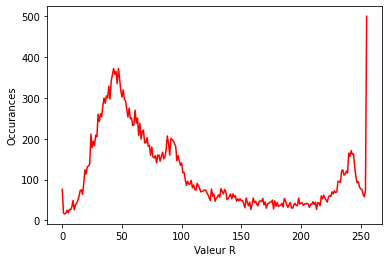

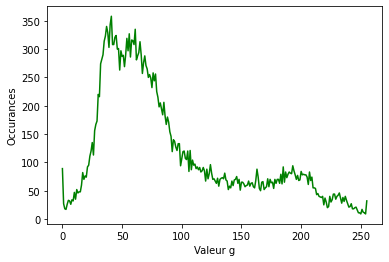

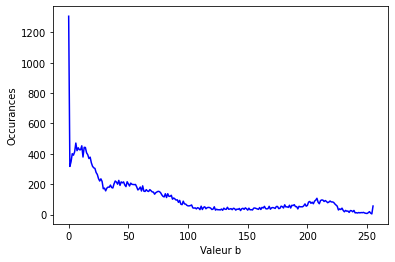

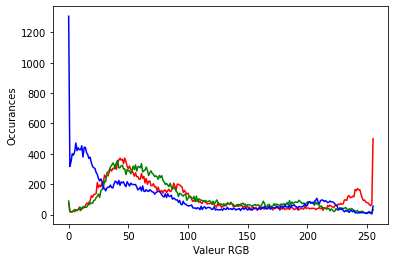

In [414]:
key_id=4
for it in list_annotations:
  if (it['image']==list_keys[key_id]) & (it['category_id']==1):
    fig,ax = plt.subplots(1,figsize=(10, 10))
    bbox = it['bbox']
    crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
    ax.imshow(crop_img)
    plt.axis('off')
    plt.show()
    hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    plt.xlabel("Valeur R")
    plt.ylabel("Occurances")
    plt.show()
    hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    plt.xlabel("Valeur g")
    plt.ylabel("Occurances")
    plt.show()
    hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.xlabel("Valeur b")
    plt.ylabel("Occurances")
    plt.show()
    hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.xlabel("Valeur RGB")
    plt.ylabel("Occurances")
    plt.show()

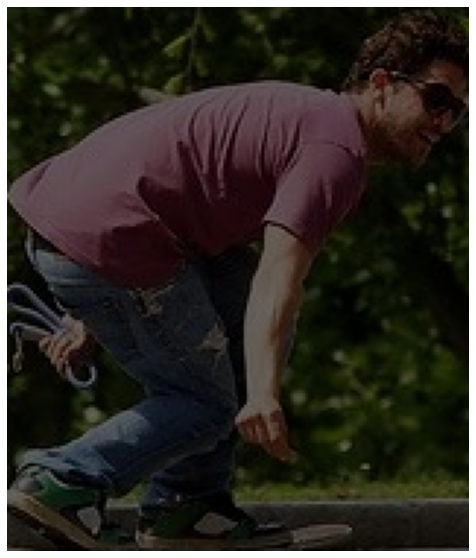

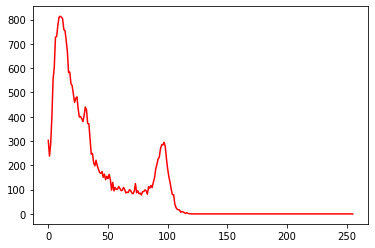

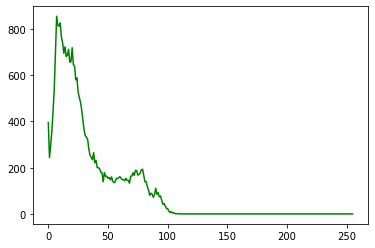

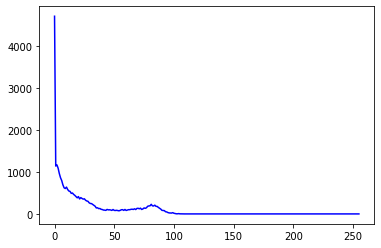

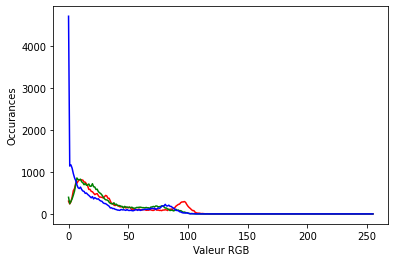

In [419]:
key_id=5
for it in list_annotations:
  if (it['image']==list_keys[key_id]) & (it['category_id']==1):
    fig,ax = plt.subplots(1,figsize=(10, 10))
    bbox = it['bbox']
    crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
    ax.imshow(crop_img)
    plt.axis('off')
    plt.show()
    hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    plt.show()
    hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    plt.show()
    hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.show()
    hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    hist = cv2.calcHist([crop_img],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    hist = cv2.calcHist([crop_img],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.xlabel("Valeur RGB")
    plt.ylabel("Occurances")
    plt.show()

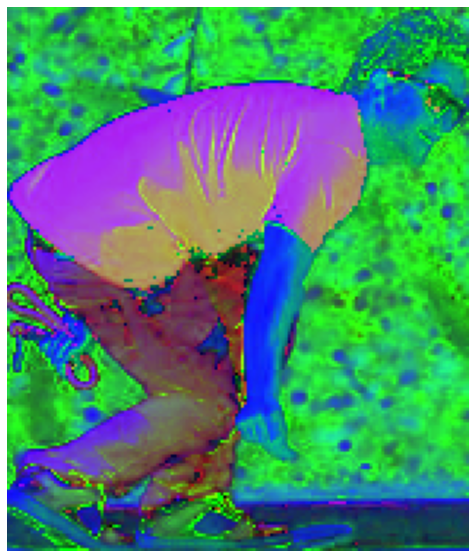

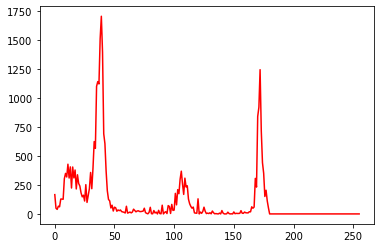

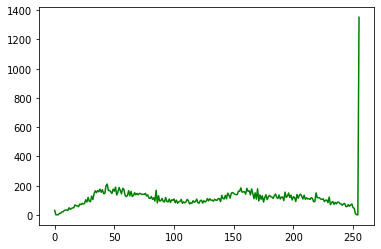

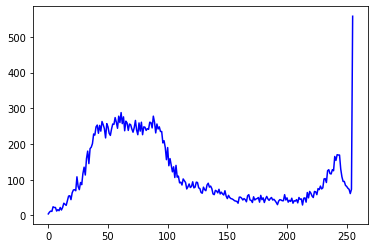

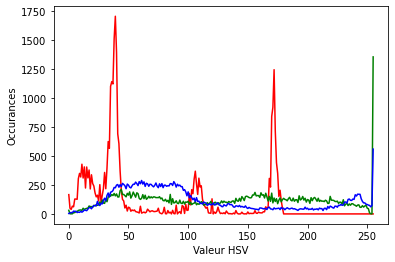

In [428]:
key_id=4
for it in list_annotations:
  if (it['image']==list_keys[key_id]) & (it['category_id']==1):
    fig,ax = plt.subplots(1,figsize=(10, 10))
    bbox = it['bbox']
    crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
    crop_img = crop_img[:,:,::-1] 
    hsv = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)
    ax.imshow(hsv)
    plt.axis('off')
    plt.show()
    hist = cv2.calcHist([hsv],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    plt.show()
    hist = cv2.calcHist([hsv],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    plt.show()
    hist = cv2.calcHist([hsv],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.show()
    hist = cv2.calcHist([hsv],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    hist = cv2.calcHist([hsv],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    hist = cv2.calcHist([hsv],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.xlabel("Valeur HSV")
    plt.ylabel("Occurances")
    plt.show()

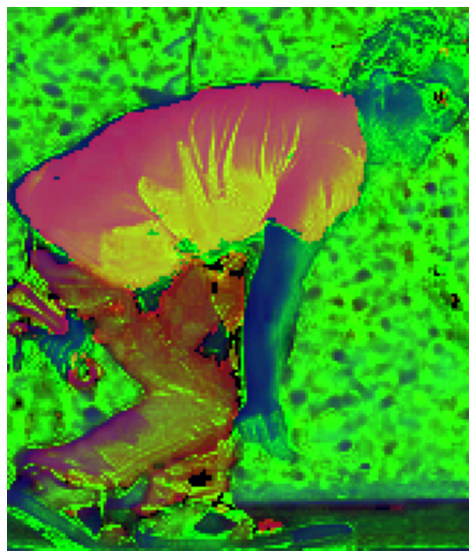

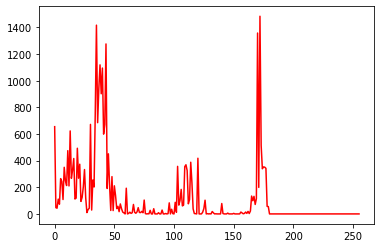

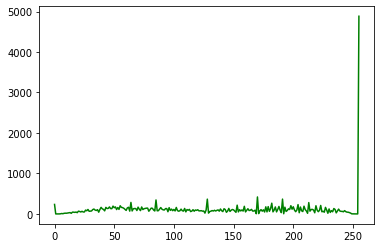

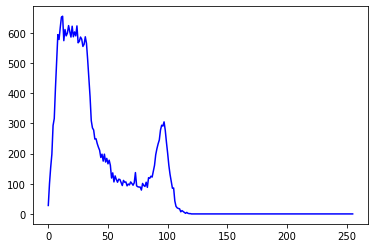

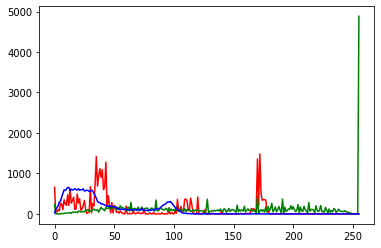

In [427]:
key_id=5
for it in list_annotations:
  if (it['image']==list_keys[key_id]) & (it['category_id']==1):
    fig,ax = plt.subplots(1,figsize=(10, 10))
    bbox = it['bbox']
    crop_img = dict_images[list_keys[key_id]][int(bbox[1]):int(bbox[1])+int(bbox[3]), int(bbox[0]):int(bbox[0])+int(bbox[2])]
    crop_img = crop_img[:,:,::-1] 
    hsv = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)
    ax.imshow(hsv)
    plt.axis('off')
    plt.show()
    hist = cv2.calcHist([hsv],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    plt.show()
    hist = cv2.calcHist([hsv],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    plt.show()
    hist = cv2.calcHist([hsv],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.show()
    hist = cv2.calcHist([hsv],[0],None,[256],[0,256])
    plt.plot(hist,'r')
    hist = cv2.calcHist([hsv],[1],None,[256],[0,256])
    plt.plot(hist,'g')
    hist = cv2.calcHist([hsv],[2],None,[256],[0,256])
    plt.plot(hist,'b')
    plt.show()

# Partie 2: Comparaison de 2 methodes de descriptions d'image

Importation des images requêtes et du database

In [ ]:
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/airplane_query.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/ball_query.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/car_query.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/cat_query.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/dolphin_query.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/face_query.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/lotus_query.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/strawberry_query.jpg


In [ ]:
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/airplane_1.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/airplane_2.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/airplane_3.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/airplane_4.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/airplane_5.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/ball_1.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/ball_2.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/ball_3.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/ball_4.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/ball_5.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/car_1.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/car_2.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/car_3.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/car_4.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/car_5.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/cat_1.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/cat_2.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/cat_3.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/cat_4.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/cat_5.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/dolphin_1.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/dolphin_2.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/dolphin_3.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/dolphin_4.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/dolphin_5.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/face_1.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/face_2.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/face_3.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/face_4.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/face_5.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/lotus_1.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/lotus_2.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/lotus_3.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/lotus_4.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/lotus_5.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/strawberry_1.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/strawberry_2.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/strawberry_3.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/strawberry_4.jpg
!gdown https://raw.githubusercontent.com/Mabelal/inf6804/master/TP1/Data/part2/database/strawberry_5.jpg


In [204]:
#query image dictionnary
list_keys = ['airplane', 'ball', 'car','cat', 'dolphin','face','lotus', 'strawberry']
dict_query = {}
for it in list_keys:
  filename = it + '_query.jpg'
  dict_query[it] = cv2.imread(filename)[:,:,::-1] 

In [206]:
#database image image dictionnary
dict_database = {}
for it in list_keys:
  for id in range(1,6):
    filename = it + '_' + str(id)+ '.jpg'
    keyname = it + '_' + str(id)
    dict_database[keyname] = cv2.imread(filename)[:,:,::-1]

## Section 1: Methode histogramme de couleur version 1



*   etape 1:creer histogramme de couleur 12bin pour toutes les images du database pour chaque channel (fonction construire image)
*   etape 2:convertir une image requête
*   etape 3: comparer avec une norme



In [216]:
def Rgb_histo(nb_bin,image):
    v_r = cv2.calcHist([image],[0],None,[nb_bin],[0,256])
    v_g = cv2.calcHist([image],[1],None,[nb_bin],[0,256])
    v_b = cv2.calcHist([image],[2],None,[nb_bin],[0,256])
    #normalisation
    v_r=v_r/np.linalg.norm(v_r)
    v_g=v_g/np.linalg.norm(v_g)
    v_b=v_b/np.linalg.norm(v_b)
    return [v_r,v_g,v_b]

In [396]:
#histogramme database
nb_bin=12;
dict_database_rgb = {}
for it in list_keys:
  for id in range(1,6):
    keyname = it + '_' + str(id)
    dict_database_rgb[keyname]=Rgb_histo(nb_bin,dict_database[keyname])

In [397]:
#histogramme requete
dict_query_rgb = {}
for it in list_keys:
  for id in range(1,6):
    dict_query_rgb[it]=Rgb_histo(nb_bin,dict_query[it])

In [333]:
def Compare_histo_norm_l2(requete_keyname):
  dict_classement={};
  for it in list_keys:
    for id in range(1,6):
      keyname = it + '_' + str(id)
      norm_r=np.linalg.norm(dict_query_rgb[requete_keyname][0]-dict_database_rgb[keyname][0])
      norm_g=np.linalg.norm(dict_query_rgb[requete_keyname][1]-dict_database_rgb[keyname][1])
      norm_b=np.linalg.norm(dict_query_rgb[requete_keyname][2]-dict_database_rgb[keyname][2])
      dict_classement[keyname]=(norm_r+norm_g+ norm_b)/3
  return sorted(dict_classement.items(), key=lambda item: item[1])

In [310]:
def Compare_histo_norm_intersection(requete_keyname):
  dict_classement={};
  for it in list_keys:
    for id in range(1,6):
      keyname = it + '_' + str(id)
      norme=[]
      for color in range(0,3):
        somme_tot=np.sum(dict_query_rgb[requete_keyname][color])
        somme=0
        for bin in range(0,nb_bin):
          somme += min(dict_query_rgb[requete_keyname][color][bin], dict_database_rgb[keyname][color][bin])
        norme.append(somme/somme_tot)
      dict_classement[keyname]=np.sum(norme)/len(norme)
  return sorted(dict_classement.items(), key=lambda item: item[1],reverse=True)

In [400]:
Compare_histo_norm_l2('lotus')

[('ball_2', 0.21138219038645426),
 ('cat_4', 0.3819377024968465),
 ('cat_5', 0.38347554206848145),
 ('strawberry_4', 0.39196252822875977),
 ('cat_2', 0.6752984523773193),
 ('strawberry_1', 0.7338847319285074),
 ('dolphin_1', 0.7611444791158041),
 ('dolphin_4', 0.8635862668355306),
 ('ball_5', 0.9561312993367513),
 ('airplane_4', 0.9719831943511963),
 ('airplane_2', 0.9921407699584961),
 ('strawberry_2', 1.0064244270324707),
 ('ball_1', 1.0067858695983887),
 ('face_3', 1.0411403973897297),
 ('strawberry_5', 1.0526727040608723),
 ('strawberry_3', 1.0621278285980225),
 ('lotus_1', 1.0820871988932292),
 ('dolphin_3', 1.1198867162068684),
 ('airplane_1', 1.1255115667978923),
 ('lotus_4', 1.1590162913004558),
 ('lotus_5', 1.1805984179178874),
 ('cat_1', 1.2069509824117024),
 ('face_5', 1.2091608047485352),
 ('face_1', 1.2174352010091145),
 ('ball_4', 1.2217535972595215),
 ('airplane_3', 1.2231675783793132),
 ('dolphin_2', 1.2269511222839355),
 ('ball_3', 1.2386234601338704),
 ('face_4', 1.24

In [399]:
Compare_histo_norm_intersection('strawberry')

[('strawberry_4', 0.7518432935078939),
 ('cat_5', 0.6995680332183838),
 ('cat_2', 0.6968034108479818),
 ('cat_4', 0.6883944670359293),
 ('ball_2', 0.6799066066741943),
 ('strawberry_1', 0.6304731369018555),
 ('airplane_4', 0.5920287768046061),
 ('dolphin_1', 0.5912179946899414),
 ('face_3', 0.5492713848749796),
 ('airplane_2', 0.5288517077763876),
 ('lotus_1', 0.5066546599070231),
 ('ball_5', 0.5019526481628418),
 ('ball_1', 0.4833931128184001),
 ('dolphin_4', 0.4783629576365153),
 ('strawberry_2', 0.44743895530700684),
 ('lotus_4', 0.4262257019678752),
 ('airplane_1', 0.4194047848383586),
 ('strawberry_3', 0.405795693397522),
 ('strawberry_5', 0.3964669704437256),
 ('face_1', 0.3926667372385661),
 ('cat_1', 0.3898611863454183),
 ('airplane_3', 0.369983434677124),
 ('dolphin_3', 0.3660062948862712),
 ('face_5', 0.33417145411173504),
 ('face_4', 0.32179005940755206),
 ('lotus_5', 0.2972911596298218),
 ('ball_3', 0.29061563809712726),
 ('cat_3', 0.28500203291575116),
 ('face_2', 0.280290